In [30]:
from DiffFlatQuad.robot import PlanerQuadrotor
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [15]:
robot = PlanerQuadrotor(rendering=False)
robot.J = 1

# Open-Loop Control Through Differential Flatness

In [5]:
t = sp.symbols('t')
x1, x3 = [sp.Function(f'x{i}')(t) for i in [1,3]]
x2 = sp.diff(x1, t)
x4 = sp.diff(x3, t)

In [6]:
x5 = sp.atan2(-sp.diff(x1, t,2), sp.diff(x3, t,2)+sp.symbols('g'))
x5

atan2(-Derivative(x1(t), (t, 2)), g + Derivative(x3(t), (t, 2)))

In [7]:
import sympy as sp  
x6 = sp.diff(x5,t)
x6

-(g + Derivative(x3(t), (t, 2)))*Derivative(x1(t), (t, 3))/((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2) + Derivative(x1(t), (t, 2))*Derivative(x3(t), (t, 3))/((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2)

In [8]:
M = sp.symbols('J')*sp.diff(x6,t)
M = M.simplify()
M

J*(2*((g + Derivative(x3(t), (t, 2)))*Derivative(x1(t), (t, 3)) - Derivative(x1(t), (t, 2))*Derivative(x3(t), (t, 3)))*((g + Derivative(x3(t), (t, 2)))*Derivative(x3(t), (t, 3)) + Derivative(x1(t), (t, 2))*Derivative(x1(t), (t, 3))) - ((g + Derivative(x3(t), (t, 2)))*Derivative(x1(t), (t, 4)) - Derivative(x1(t), (t, 2))*Derivative(x3(t), (t, 4)))*((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2))/((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2)**2

In [9]:
F = sp.symbols('m')*(sp.diff(x4,t)+sp.symbols('g'))/sp.cos(x5)
F

m*sqrt((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2)

In [13]:
X = sp.Matrix([x1, x2, x3, x4, x5, x6])
X.simplify()
X

Matrix([
[                                                                                                                                                                                 x1(t)],
[                                                                                                                                                                  Derivative(x1(t), t)],
[                                                                                                                                                                                 x3(t)],
[                                                                                                                                                                  Derivative(x3(t), t)],
[                                                                                                                      atan2(-Derivative(x1(t), (t, 2)), g + Derivative(x3(t), (t, 2)))],
[(-(g + Derivative(x3(t), (t, 2)))*Derivative(x1(t), (t, 3)) 

In [18]:
x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4 = sp.symbols('x DxDt D2xDt2 D3Dt3 D4xDt4 y DyDt D2yDt2 D3yDt3 D4yDt4')
t = sp.symbols('t')
F = F.subs({x1:x, sp.diff(x1, t, 1):dx_dt, sp.diff(x1, t, 2):d2x_dt2, sp.diff(x1, t, 3):d3x_dt3, sp.diff(x1, t, 4):d4x_dt4, 
        x3:y, sp.diff(x3, t, 1):dy_dt, sp.diff(x3, t, 2):d2y_dt2, sp.diff(x3, t, 3):d3y_dt3, sp.diff(x3, t, 4):d4y_dt4, 
        sp.symbols('J'):robot.J, 
        sp.symbols('m'):robot.mass, 
        sp.symbols('g'):np.linalg.norm(robot.gravity)})

M = M.subs({x1:x, sp.diff(x1, t, 1):dx_dt, sp.diff(x1, t, 2):d2x_dt2, sp.diff(x1, t, 3):d3x_dt3, sp.diff(x1, t, 4):d4x_dt4,
                x3:y, sp.diff(x3, t, 1):dy_dt, sp.diff(x3, t, 2):d2y_dt2, sp.diff(x3, t, 3):d3y_dt3, sp.diff(x3, t, 4):d4y_dt4,
                sp.symbols('J'):robot.J,
                sp.symbols('m'):robot.mass,
                sp.symbols('g'):np.linalg.norm(robot.gravity)})

X = X.subs({x1:x, sp.diff(x1, t, 1):dx_dt, sp.diff(x1, t, 2):d2x_dt2, sp.diff(x1, t, 3):d3x_dt3, sp.diff(x1, t, 4):d4x_dt4,
                x3:y, sp.diff(x3, t, 1):dy_dt, sp.diff(x3, t, 2):d2y_dt2, sp.diff(x3, t, 3):d3y_dt3, sp.diff(x3, t, 4):d4y_dt4,
                sp.symbols('J'):robot.J,
                sp.symbols('m'):robot.mass,
                sp.symbols('g'):np.linalg.norm(robot.gravity)})

F_np = sp.lambdify((x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4), F, 'numpy')
M_np = sp.lambdify((x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4), M, 'numpy')
X_np = sp.lambdify((x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4), X, 'numpy')

Now generate an example circular trajectory for the drone to follow

In [19]:
T = 10
omega = 2* 2*np.pi/T


time_num = np.linspace(0, T, int(T/0.01)+1)
x = np.sin(omega*time_num)
dx_dt = np.cos(omega*time_num)*omega
d2x_dt2 = -np.sin(omega*time_num) * omega**2
d3x_dt3 = -np.cos(omega*time_num) * omega**3
d4x_dt4 = np.sin(omega*time_num) * omega**4

y = np.cos(omega*time_num)
dy_dt = -np.sin(omega*time_num) * omega
d2y_dt2 = -np.cos(omega*time_num) * omega**2
d3y_dt3 = np.sin(omega*time_num) * omega**3
d4y_dt4 = np.cos(omega*time_num) * omega**4


In [27]:
import time
# Feed the trajectory the mappings found through the differential flatness analysis 
thrust = F_np(x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4)
torque = M_np(x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4)
states = X_np(x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4).squeeze()
# Intialize the robot with the initial states computed from the differential flatness analysis
robot.x[0]=states[0,0]
robot.x[1]=states[2,0]
robot.v[0]=states[1,0]
robot.v[1]=states[3,0]
robot.theta = states[4,0]
robot.omega = states[5,0]

# Feed the computed thrust and torques to the drone in open loop and record the robot's states
state = []
for i in range(len(time_num)):
    state.append([robot.x[0], robot.v[0], robot.x[1], robot.v[1], robot.theta, robot.omega])
    robot.step(T = torque[i], F = thrust[i])
    # time.sleep(0.01)
state = np.array(state).T

Now compare the robot's state against the desired value

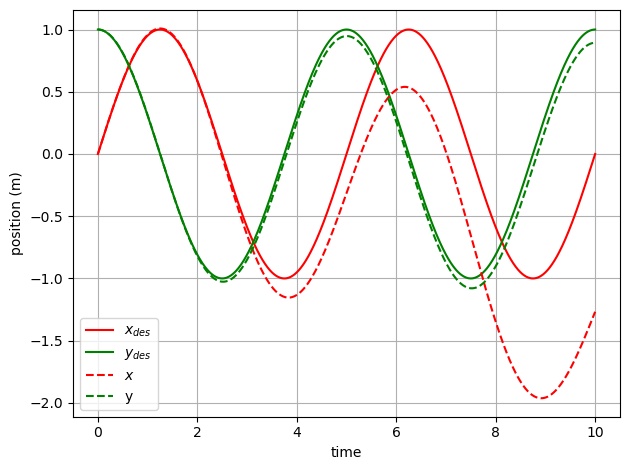

In [46]:
plt.plot(time_num, states[[0],:].T, 'r')
plt.plot(time_num, states[[2],:].T, 'g')

plt.plot(time_num, state[[0],:].T, 'r--')
plt.plot(time_num, state[[2],:].T, 'g--')
plt.legend(['$x_{des}$', '$y_{des}$', '$x$', 'y'])
plt.xlabel('time')
plt.ylabel('position (m)')
plt.grid(True)
plt.tight_layout()
plt.savefig('results/openloop_performance.pdf')

As we can see, eventhough the control inputs provided through the differential flatness formulation initially keeps the drone close to the desired trajectory, after a short amount of time the robot deviates as there are no feedback loops to correct for the numerical inaccuracies (in this case Eular integration error).